In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Merged_data/Merged_all.csv')
df

,年,月份,站名,進站,出站,相鄰站數,人口數,男,女,公司數,學校數,鄰近股份有限公司數量,鄰近學校數量,鄰近醫療數量,鄰近嫌避數量
0,2017,1,BL板橋,1134351,1208435,3,127547.0,62804.0,64743.0,160.0,10.0,299,39,4,1
1,2017,1,七張,461390,446348,3,55812.0,26738.0,29074.0,47.0,7.0,267,47,3,4
2,2017,1,三和國中,342099,322093,2,29216.0,14246.0,14970.0,32.0,3.0,172,35,0,5
3,2017,1,三民高中,353404,352052,2,65346.0,32094.0,33252.0,35.0,4.0,110,50,2,1
4,2017,1,三重,128942,129165,4,29521.0,14388.0,15133.0,64.0,3.0,195,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,2022,7,頂埔,210444,200389,1,27328.0,13508.0,13820.0,183.0,2.0,263,5,1,2
8135,2022,7,頂溪,777742,796423,2,128545.0,61062.0,67483.0,129.0,9.0,197,30,2,0
8136,2022,7,頭前庄,138955,138213,4,41377.0,20051.0,21326.0,62.0,2.0,187,3,0,1
8137,2022,7,麟光,102437,96127,2,11842.0,5601.0,6241.0,8.0,0.0,75,0,0,0


In [3]:
df2 = df[['進站', '出站', '人口數','相鄰站數', '鄰近股份有限公司數量', '鄰近學校數量', '鄰近醫療數量','鄰近嫌避數量']]

In [4]:
df2.head(5)

,進站,出站,人口數,相鄰站數,鄰近股份有限公司數量,鄰近學校數量,鄰近醫療數量,鄰近嫌避數量
0,1134351,1208435,127547.0,3,299,39,4,1
1,461390,446348,55812.0,3,267,47,3,4
2,342099,322093,29216.0,2,172,35,0,5
3,353404,352052,65346.0,2,110,50,2,1
4,128942,129165,29521.0,4,195,27,0,1


In [9]:
df2.columns = ["in", "out", "population", "station", "company", "school", "hospital", "dis" ]
df2

,in,out,population,station,company,school,hospital,dis
0,1134351,1208435,127547.0,3,299,39,4,1
1,461390,446348,55812.0,3,267,47,3,4
2,342099,322093,29216.0,2,172,35,0,5
3,353404,352052,65346.0,2,110,50,2,1
4,128942,129165,29521.0,4,195,27,0,1
...,...,...,...,...,...,...,...,...
8134,210444,200389,27328.0,1,263,5,1,2
8135,777742,796423,128545.0,2,197,30,2,0
8136,138955,138213,41377.0,4,187,3,0,1
8137,102437,96127,11842.0,2,75,0,0,0


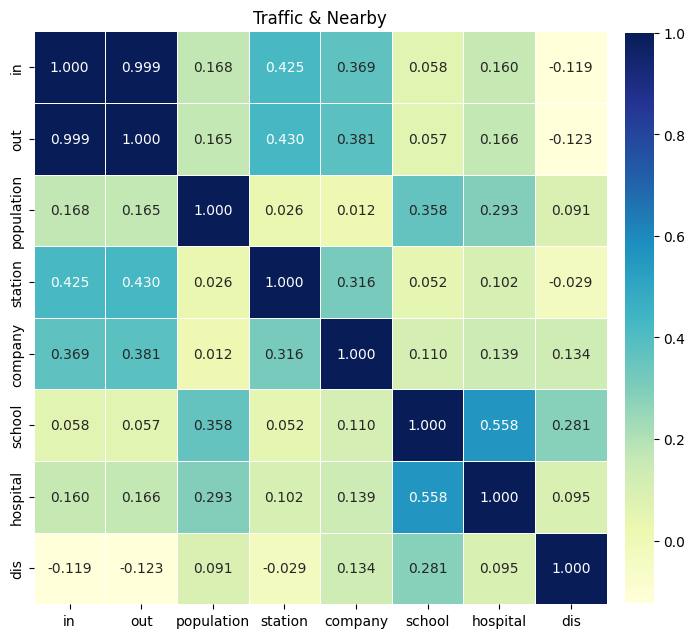

In [10]:
datacor = np.corrcoef(df2, rowvar=0)
datacor = pd.DataFrame(data=datacor, columns=df2.columns, index=df2.columns)
plt.figure(figsize=(8,8))
ax = sns.heatmap(datacor, square=True, annot=True, fmt=".3f", linewidths=.5,cmap="YlGnBu", cbar_kws={"fraction":0.046, "pad":0.03})
ax.set_title("Traffic & Nearby")
#plt.show()
plt.savefig('traffic_nearby.png')

In [8]:
#station_onehot = pd.get_dummies(df['站名'])
#station_onehot = 

,BL板橋,Y板橋,七張,三和國中,三民高中,三重,三重國小,中原,中和,中山,...,輔大,辛亥,迴龍,關渡,雙連,頂埔,頂溪,頭前庄,麟光,龍山寺
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
df['月份'] = pd.Categorical(df['月份']).codes
df['年'] = pd.Categorical(df['年']).codes
df['站名'] = pd.Categorical(df['站名']).codes

In [7]:
df_X = df[['相鄰站數','人口數','鄰近股份有限公司數量', '鄰近學校數量', '鄰近醫療數量','鄰近嫌避數量']]
df_X

,相鄰站數,人口數,鄰近股份有限公司數量,鄰近學校數量,鄰近醫療數量,鄰近嫌避數量
0,3,127547.0,299,39,4,1
1,3,55812.0,267,47,3,4
2,2,29216.0,172,35,0,5
3,2,65346.0,110,50,2,1
4,4,29521.0,195,27,0,1
...,...,...,...,...,...,...
8134,1,27328.0,263,5,1,2
8135,2,128545.0,197,30,2,0
8136,4,41377.0,187,3,0,1
8137,2,11842.0,75,0,0,0


In [49]:
df_X['鄰近學校數量'].unique()

array([39, 47, 35, 50, 27, 24, 30, 23, 46, 21, 26, 51,  9, 38, 32, 10, 25,
       16, 33, 28, 36, 15,  8,  5, 29, 11, 14,  6, 18, 17, 22,  0, 37,  2,
        4, 43, 12, 20,  7, 19,  3, 13], dtype=int64)

In [43]:
model.coef_

array([ 1.90617505e+05,  2.58536741e+00,  1.03637184e+03, -2.09475010e+03,
        3.33850453e+04, -5.49275900e+04])

In [9]:
df_y = df["進站"]
df_y

0       1134351
1        461390
2        342099
3        353404
4        128942
         ...   
8134     210444
8135     777742
8136     138955
8137     102437
8138     606413
Name: 進站, Length: 8139, dtype: int64

In [11]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

print("X shape: {}".format(df_X.shape))
print("y shape: {}".format(df_y.shape))


#Split dataset into training/testing data
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=1)

#Build model
model = linear_model.Lasso(alpha=0.1)
#model = linear_model.Ridge(alpha=1.0)
#model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model using the training sets
model.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = model.predict(df_X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(df_y_test, df_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(df_y_test, df_y_pred)))
print('number of model coef: {}'.format(np.sum(model.coef_ != 0)))

X shape: (8139, 6)
y shape: (8139,)
Coefficients: [ 1.90617505e+05  2.58536741e+00  1.03637184e+03 -2.09475010e+03
  3.33850453e+04 -5.49275900e+04]

Mean squared error: 201100875630.96835
R2 score: 0.29738993793559465
number of model coef: 6


In [42]:
model.coef_[3]

-2094.7501003090947